<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


**ФИО: Сюй Алиса**

**Твой любимый аник:**

  
<img src = 'https://sun9-47.userapi.com/impg/FdaOU9orBEOYhFBd15rh7aV2pNeoC9qR97GUOg/eUHKB3up_dA.jpg?size=711x960&quality=96&sign=875c00c0a1fb32b1c28836be1446bd05&type=album' width = 400>

## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 24.03.2024

__Жесткий дедлайн:__ 23:59MSK 31.03.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [ ]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [ ]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [ ]:
df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'],  dayfirst=True)
df_rates['Дата'] = pd.to_datetime(df_rates['Дата'], dayfirst=True)

__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.
`
Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [ ]:
def correct_values(value):
    corrected_value = value.replace('.', '')    # боремся с точками в разрядах

    dictionary = {"M": '', "B": '', "K": '', ',': '.', '%':''}    # на это будем заменять
    corrected_value = corrected_value.translate(str.maketrans(dictionary)) # практикуем пакетную замену через str.maketrans, применяем с помощью translate
    corrected_value = float(corrected_value)

    if 'B' in value:
        corrected_value *= 10 ** 9
    elif 'M' in value:
        corrected_value *= 10 ** 6
    elif 'K' in value:
        corrected_value *= 10 ** 3
    return corrected_value

In [ ]:
df_stocks.iloc[0:,1:7] = df_stocks.iloc[0:,1:7].applymap(correct_values, na_action='ignore')    # применяем к колонкам с вещественными признаками
df_rates.iloc[0:,1:] = df_rates.iloc[0:,1:].applymap(correct_values, na_action='ignore')

Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [ ]:
df_merged = df_stocks.merge(df_rates, how = 'left', on = 'Дата')
df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.9,194.4,191.73,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,193.15,192.49,193.5,191.09,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,193.6,195.18,195.41,192.97,37150000.0,-0.55,AAPL,101.467,92.0,11.791


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [ ]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
}

for ticker, curr_pair in stocks_currency_dict.items():
    rate = np.array(df_merged.loc[df_merged['Тикер'] == ticker, [curr_pair]])   # здесь выбираем колонку с нужной валютой для тикера из цикла
    df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']]*=rate   # ну а здесь умножаем 4 столбца на этот курс

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.804,17565.984,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17298.3088,17348.3504,17394.8176,17261.6712,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17628.8005,17568.5623,17660.745,17440.7843,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17694.963,17746.2926,17771.9574,17674.7978,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17811.2,17956.56,17977.72,17753.24,37150000.0,-0.55,AAPL,101.467,92.0,11.791


Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [ ]:
df_merged[df_merged.isnull().any(axis = 1)]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
1974,2016-02-27,7441.3003,7441.3003,7441.3003,7441.3003,NaN,300.12,AAPL,83.492,76.754,9.891
2800,2022-11-21,5195.4056,5214.67086,5238.9078,5191.05538,NaN,-0.65,BMWG,62.146,60.85,7.849
2944,2022-05-03,5745.28332,5618.13714,5745.28332,5593.71358,NaN,3.01,BMWG,71.834,70.96,8.697
2945,2022-05-02,5760.65508,5768.07478,5820.75465,5517.28892,NaN,-1.11,BMWG,74.197,73.44,9.006
7838,2022-11-21,3847.45886,3833.16528,3882.26062,3825.0863,NaN,-0.5,MBGn,62.146,60.85,7.849
7981,2022-05-04,4377.31124,4422.25716,4443.32556,4374.50212,NaN,-0.87,MBGn,70.228,66.3,8.425
7982,2022-05-03,4516.92192,4476.69488,4517.64026,4424.9744,NaN,1.06,MBGn,71.834,70.96,8.697
7988,2022-04-25,5181.59174,5173.47394,5227.8632,5110.96688,NaN,-1.39,MBGn,81.178,73.125,9.56
17313,2015-01-17,1037.632,1037.632,1037.632,1037.632,NaN,4.82,Tencent,75.166,64.942,8.368


Просто информации об объемах нет в 9 строках, преимущественно за 2022 год, отправим их домой ниже

---



In [ ]:
df_merged.dropna(inplace = True)

__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [ ]:
np.unique(df_stocks['Тикер'])     # всего 7 штук

array(['AAPL', 'BMWG', 'GAZP', 'MBGn', 'MSFT', 'Tencent', 'VTBR'],
      dtype=object)

__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [ ]:
day_diffs = df_merged.copy()    # чтобы табличка не перезаписывалась делаем копию

In [ ]:
day_diffs['day_diffs'] = abs(np.diff(df_merged[['Макс.','Мин.']])).flatten()
day_diffs = day_diffs.sort_values(by='day_diffs', ascending = False)
day_diffs.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,day_diffs
9254,2017-04-19,3990.681,3970.69125,3999.1615,3961.605,2850000.0,0.5,MBGn,60.575,56.583,7.274,2237.049
17299,2015-02-05,1126.352,1141.37575,1141.37575,1108.06595,18010000.0,0.97,Tencent,76.2,66.49,8.585,1986.89472
5525,2022-01-24,294.59,310.8,314.0,280.6,236550000.0,-5.46,GAZP,89.234,78.786,10.09,1779.9
1505,2018-01-05,2493.3125,2471.0864,2498.4416,2465.3874,94640000.0,1.13,AAPL,68.669,56.99,7.283,1659.23316
1072,2019-09-26,3529.73364,3531.66,3546.42876,3513.03852,76350000.0,-0.52,AAPL,70.124,64.212,8.196,1595.88


Microsoft уж больно волатильная штучка

---



__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [ ]:
max_volume = df_merged.copy()

In [ ]:
max_volume['volume_in_rub'] = max_volume['Цена']*max_volume['Объём']
max_volume = max_volume.sort_values(by = 'volume_in_rub', ascending=False )
max_volume[:10]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB,volume_in_rub
843,2020-08-24,9394.1904,9606.168,9612.1392,9250.8816,345940000.0,1.2,AAPL,87.965,74.64,9.61,3249826226976.0
844,2020-08-21,9302.876,8920.648,9340.276,8919.9,338050000.0,5.15,AAPL,88.214,74.8,9.644,3144837231800.0
834,2020-09-04,9121.47264,9054.35863,9328.0933,8362.10401,332610000.0,0.07,AAPL,89.25,75.409,9.703,3033893014790.399902
859,2020-07-31,7906.91286,7655.40368,7918.81862,7502.86113,374300000.0,10.47,AAPL,87.555,74.411,9.576,2959557483498.0
456,2022-03-08,20073.6,20249.55,20767.2,19864.5,131150000.0,-1.17,AAPL,118.993,127.5,16.307,2632652640000.0
10099,2023-12-15,33467.65075,33117.38375,33618.41,33065.927,78500000.0,1.31,MSFT,98.547,90.275,11.617,2627210583875.0
510,2021-12-17,12687.12162,12597.42069,12859.85151,12579.62877,195920000.0,-0.65,AAPL,83.361,74.133,9.488,2485660867790.399414
858,2020-08-03,7965.1481,7911.043,8162.5586,7888.37735,308150000.0,2.52,AAPL,86.018,73.115,9.412,2454460387015.0
808,2020-10-13,9330.6339,9651.92823,9661.17411,9218.91285,262330000.0,-2.65,AAPL,90.47,77.049,9.921,2447705190987.0
482,2022-01-28,13256.44324,12896.87788,13257.9998,12670.3984,179940000.0,6.98,AAPL,86.795,77.828,10.019,2385364396605.600586


Почти ожидаемо в топ 10 Apple. Ну и один раз Майкрософт втиснулся сюда. Оказывается рейтинговое агенство Mizuho Securities повысило целевую цену бумаг с прежней планки на 1,07% https://www.sahmcapital.com/news/content/mizuho-maintains-buy-on-microsoft-raises-price-target-to-450-2023-12-15 за период 15 декабря 2023 года.


<img src = 'https://sun9-49.userapi.com/impg/KUHeK9qL-KwTBmm2BOkfy5ugbLA8c4WlNAf3UQ/f9YEyqeIrnE.jpg?size=1924x622&quality=96&sign=fb7a7789a557888f47516057a97cc089&type=album' width = 700>

Объемы действительно большие в сранении со средними торгами

---



__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [ ]:
max_delta = df_merged.copy()
max_delta['Изм. %'] = abs(max_delta['Изм. %'])
res = max_delta.groupby(by = 'Дата', as_index=False)['Изм. %'].mean().sort_values(by = 'Изм. %', ascending=False)
res[:5]

,Дата,Изм. %
2125,2022-02-24,13.081429
562,2016-02-29,11.84
1623,2020-03-24,10.795714
1615,2020-03-12,10.615714
2122,2022-02-21,9.128


__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [ ]:
top_5_diff = pd.DataFrame(res[:5])
top_5_diff.set_index(['Дата'], inplace = True)    # дальше будем использовать это, быстренько сменю индексы на дату колонку
top_5_diff

,Изм. %
Дата,
2022-02-24,13.081429
2016-02-29,11.84
2020-03-24,10.795714
2020-03-12,10.615714
2022-02-21,9.128


__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [ ]:
df = pd.pivot_table(df_merged, index = 'Дата', columns = 'Тикер', values = 'Цена')
df.head()

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,653.725,3780.51916,NaN,2789.9091,1229.996,418.02048,NaN
2014-01-03,641.424,3788.67372,NaN,2784.88722,1225.412,410.55816,NaN
2014-01-06,645.2703,3756.04441,135.47,2785.23886,1199.8773,411.98177,0.04846
2014-01-07,639.2706,3770.02665,NaN,2815.6752,1206.6274,409.79112,NaN
2014-01-08,643.96557,3803.54355,137.33,2801.87619,1186.40952,416.51786,0.04791




__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также нистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__

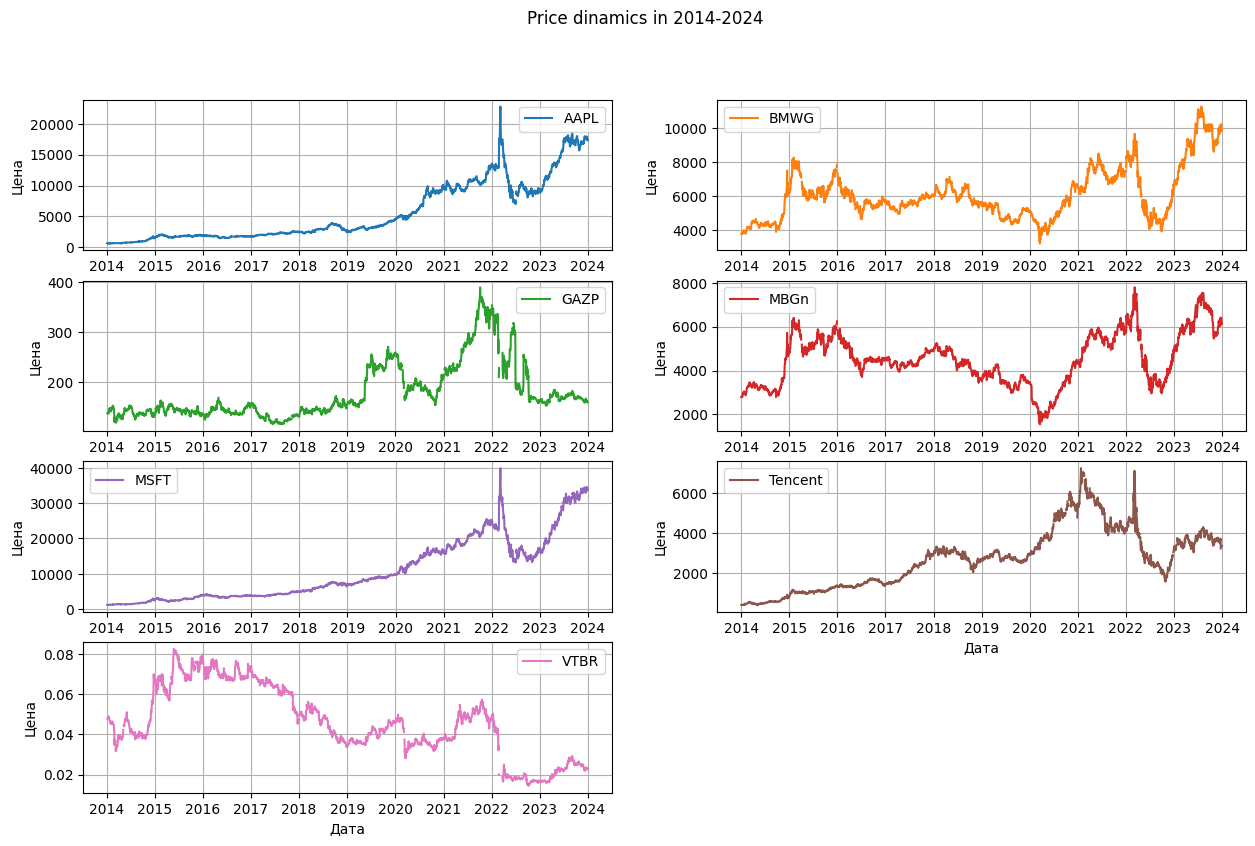

In [ ]:
df.plot(subplots=True, layout=(-1, 2), figsize=(15, 9), grid=bool,
        title="Price dinamics in 2014-2024", ylabel = 'Цена', sharex=False);

По графикам динамики цен можно заметить резкий обвал котировок в 2022 году, в датасете представлена только 2 российские акции - ВТБ и Газпром, на этих графиках есть дыры в данных в начале этого периода, это связано с приостановкой торгов фин активами мосбиржей на фоне сво, торги в РФ были заморожены с 28 февраля по 21 марта https://frankmedia.ru/63307. Данный кейс лучше заметен на графике ВТБ. По американским акциям: в 2022 году передают привет последствия вертолетных денег времен ковида, инфляционные ожидания растут, цены на энергоносители и потреб товары тоже, отчасти сказывается сво и ситуация с импортируемыми из РФ и Украины грузами. Безработица низкая, ФРС начинает проводить жесткую дкп, ставка растет, цены акций падают, но спрос на потреб кредиты как обычно стойкий, ох уж эти американцы и их любовь к заемным деньгам. https://www.federalreserve.gov/publications/2022-ar-monetary-policy.htm. В целом прямого влияния на котировки американских компаний сво не имеет. С 2022 и до текущего момента ставка ФРС рослаhttps://www.macrotrends.net/2015/fed-funds-rate-historical-chart, сейчас на максимуме с сентября 2006 года.


Про ковид: разгар в 2020 году, акции фарм компаний росли неплохо, но таковых на наших графиках нет. Котировки акций падали, индексы тоже, это связано с падением темпа эконом роста, остановкой или сбоями в производстве - > спад спроса на сырье. Все сказывалось на прибыли компаний, кто-то не выплачивал дивиденды, кто-то не мог выплачивать по ранее взятым кредитам (но это в основном мелкие предприятия). Конкретно в РФ, был отток капитала с фондового рынка в более надежные депозиты, со ставками 15-20%, доходность которую в кризисное время не всякая компания может обеспечить. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8646943/


Боролись что США, что Россия с последствиями ковида большими пособиями, субсидиями и налоговыми послаблениями для компаний и населения, отсюда плавно перетекаем в кейс с раздутой инфляцией из начала комментария.

Дополнение: так же на российских акциях заметен небольшой спад в 2014 году, из-за санкций после Крымской истории. Акции BMWG - БМВ и MBGN - мерс одноотраслевые, корреляция по графикам сильная - динамика практически идентична, в кризисные времена спад спроса отображаться будет одинаково, тк товары примерно одного сегмента.


---



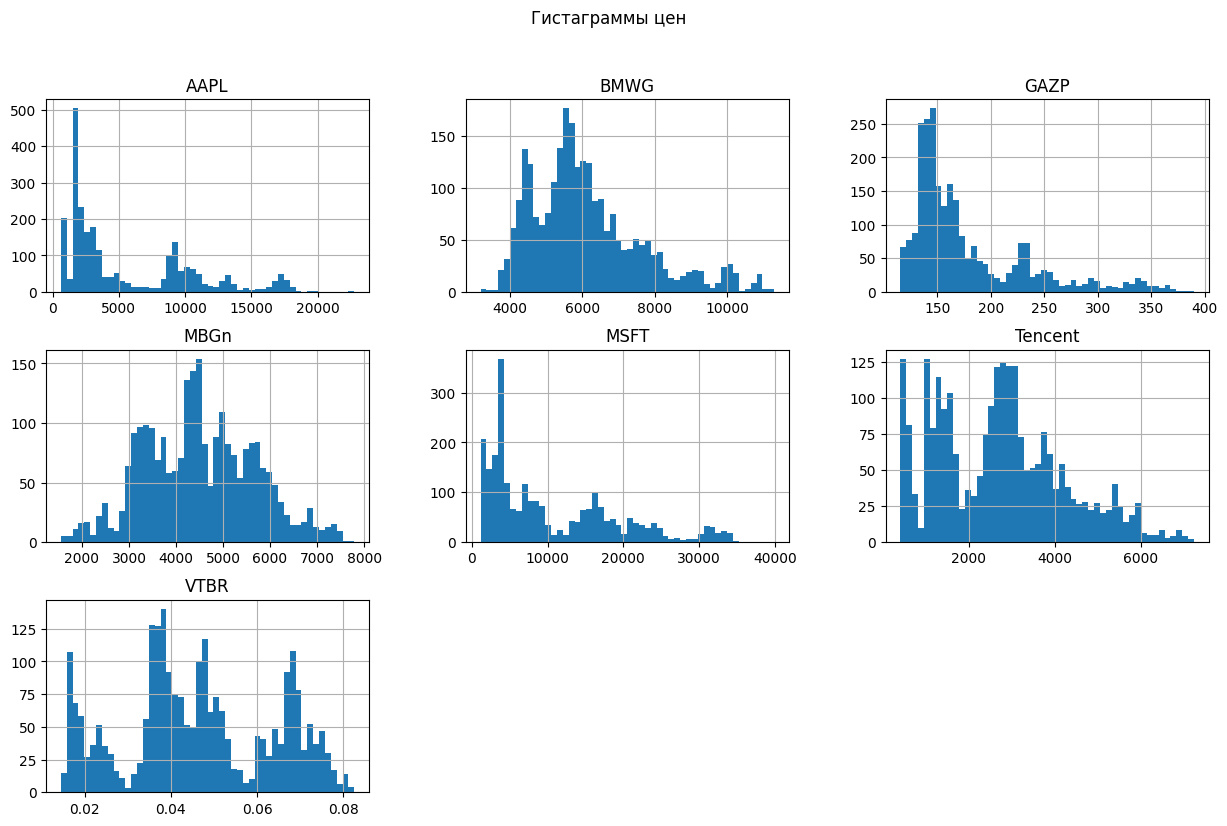

In [ ]:
df.astype('float').hist(figsize=(15, 9),bins=50);
plt.suptitle('Гистаграммы цен');

По иксу у нас цена, по у - количество наблюдений. Теперь про распределение цен: BMWG - БМВ и MBGN - мерседенс отдаленно можно сравнить с графиком нормального распределения из-за колокообразной формы, правда в случае с БМВ график имеет положительную ассиметрию, можно заметить достаточно длинный правый хвост. Мат ожидание цены меньше средней цены, средняя цена смещена вправо из-за длинного правого хвоста, вероятнее всего при большем числе наблюдений гистограмма будет сильнее похожа на нормальное распределение.

---



Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [ ]:
df_pct_change = (df.pct_change())*100   # доможим на 100, чтобы получить проценты
df_pct_change.head()

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-1.881678,0.215699,NaN,-0.180002,-0.372684,-1.785157,NaN
2014-01-06,0.599650,-0.861233,NaN,0.012627,-2.083764,0.346750,NaN
2014-01-07,-0.929796,0.372260,0.000000,1.092773,0.562566,-0.531735,0.000000
2014-01-08,0.734426,0.889036,1.372998,-0.490078,-1.675569,1.641505,-1.134957


__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

Ответ: ответы под графиками

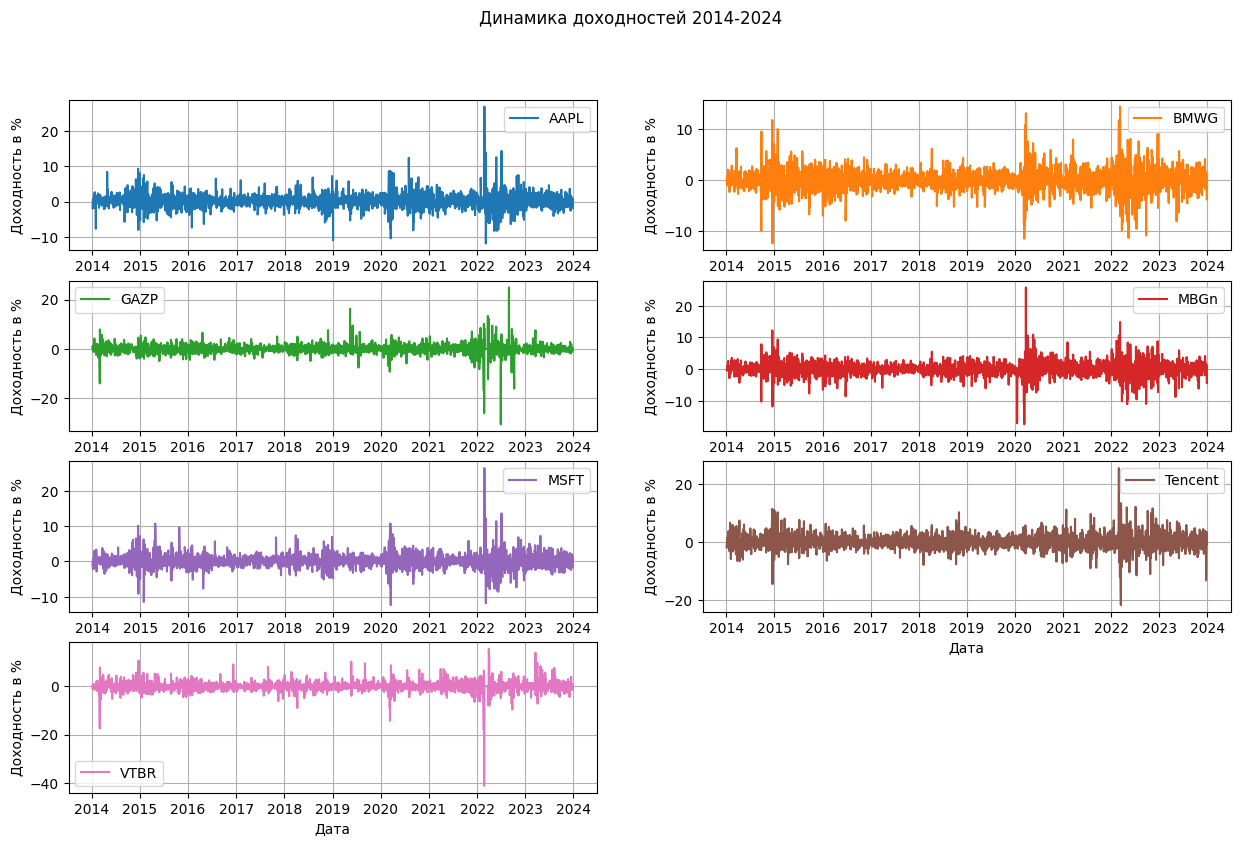

In [ ]:
df_pct_change.plot(subplots=True, layout=(-1, 2), figsize=(15, 9), sharex = False, grid = bool,
                   ylabel = 'Доходность в %', title = 'Динамика доходностей 2014-2024');

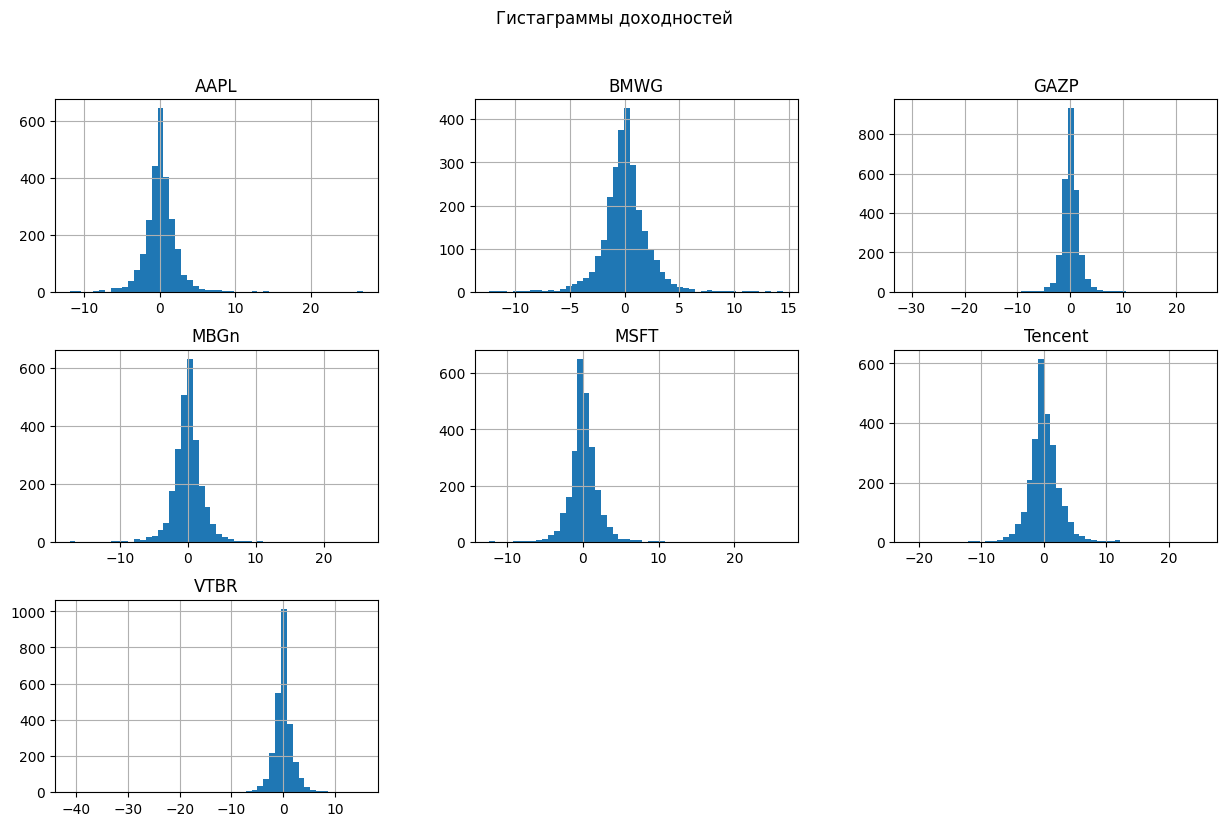

In [ ]:
df_pct_change.hist(figsize=(15, 9), bins = 50);
plt.suptitle('Гистаграммы доходностей ');

- Имеют ли доходности по акциям нормальное распределение?

По Ох - доходность в процентах, по Оу - количество наблюдений.
Да, во всех случаях видим, что гистограммы доходностей фин активов имеют нормальный вид. По цпт: сумма большого количества случайных и независимых переменных, будет стремиться к нормальному распределению. Доходность фин актива можно охарактеризовать как случайную величину, на которую оказывает влияние множество факторов (макро-полит фон, корпоративные факторы, отраслевая ерунда и приколы и тд), поэтому распределение доходности также будет приближаться к нормальному виду.


---




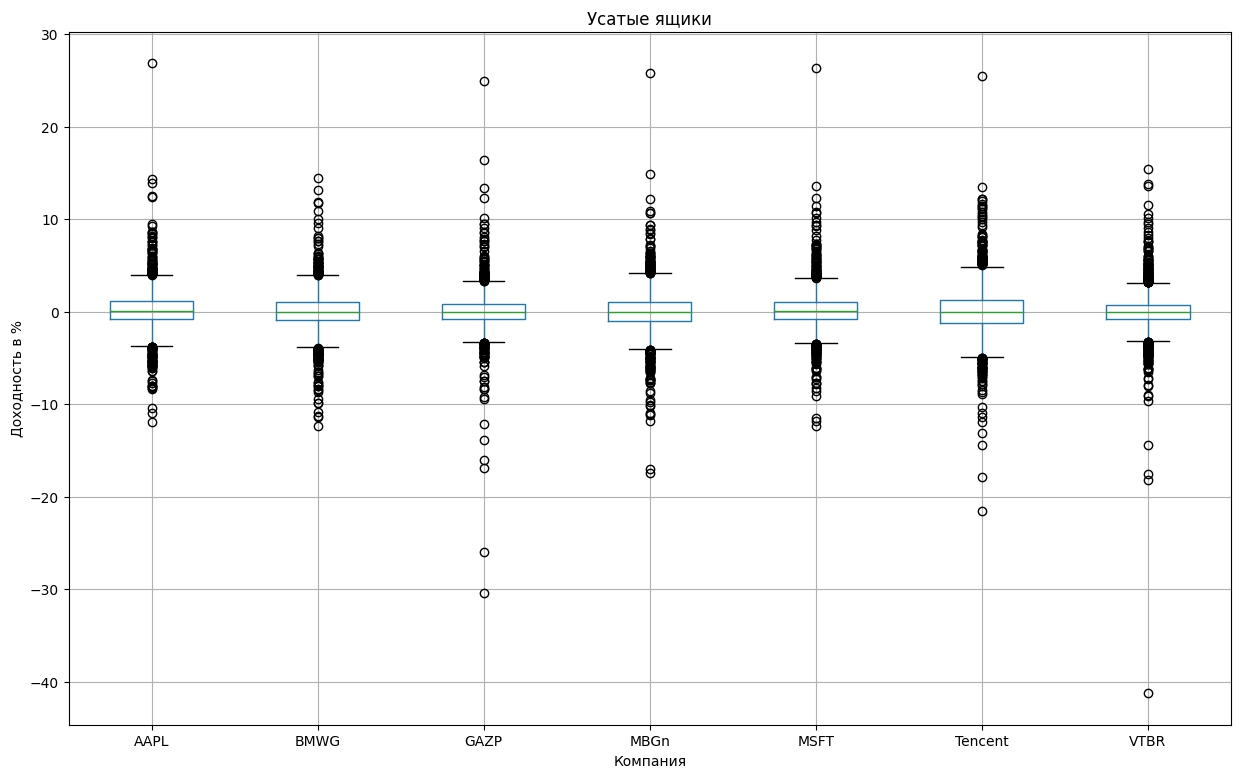

In [ ]:
df_pct_change.boxplot(figsize=(15, 9), ylabel = 'Доходность в %', xlabel = 'Компания');
plt.title('Усатые ящики');

* Видно ли по ящику с усами, что в данных довольно много выбросов?

Если считать, что все точки, лежащие за пределами усов является выбросами, то да, в достаточно данных много таких значений, некоторые акции могут быть достаточно волатильны (выше выводили топ 10 по разнице макс-мин за день, там один Майкрософт занял все 10 позиций:). Экстремальных выбросов поменьше, будем условно считать, что все точки за пределами 25% по модулю будут таковыми.

А вообще это грубая оценка, надо согласовать, какое значение будет считаться нетипичным, а какое нет. Надо смотреть по ситуации, может и так сложиться, что близкие к концам усов точки и не будут считаться выбросами.

---



__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [ ]:
df_pct_change['Изм. (RUB) %'] = abs(df_pct_change).mean(axis = 1)
df_pct_change.head()

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR,Изм. (RUB) %
Дата,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-1.881678,0.215699,NaN,-0.180002,-0.372684,-1.785157,NaN,0.887044
2014-01-06,0.599650,-0.861233,NaN,0.012627,-2.083764,0.346750,NaN,0.780805
2014-01-07,-0.929796,0.372260,0.000000,1.092773,0.562566,-0.531735,0.000000,0.498447
2014-01-08,0.734426,0.889036,1.372998,-0.490078,-1.675569,1.641505,-1.134957,1.134081


Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

In [ ]:
top_5_diff = top_5_diff.join(df_pct_change['Изм. (RUB) %'])
top_5_diff.head()

,Изм. %,Изм. (RUB) %
Дата,,
2022-02-24,13.081429,12.677837
2016-02-29,11.84,1.631587
2020-03-24,10.795714,9.703503
2020-03-12,10.615714,9.195150
2022-02-21,9.128,5.438385


__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__

Во всех 5 случаях видим, то рублевая дельта меньше, чем валютное изменение.  Акции растут и падают одинаково на всех площадках, но на иностранных для эмитента бумаги - на размер с учетом валютного курса. Если этот паритет (цена в рф = цена зарубежом * обратный валютный курс + комиссии и сборы местных торговых систем) не выполняется, то приходят арбитражеры, которые покупают там где дешево, продают там где дорого и наоборот для шортовых позиций. Это условие идеального рынка из книжек, в реальной жизни арбитражные возможности быстро закрываются. Как говорится кто успел - того и тапки. В общем здесь ссылаемся на динамику валютного курса, в табличке есть около кризисные даны, где рубль был достаточно волатилен, а именно февраль 2022, короновирус 2020, ну и мб кризис 2016 года тоже сюда пробрался


---



## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [ ]:
w = np.arange(0,1,0.01)
w

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [ ]:
df_pct_change=df_pct_change/100 # перевожу проценты в числа

In [ ]:
r1 = (1+df_pct_change['AAPL'].mean())**252-1
r2 = (1+df_pct_change['Tencent'].mean())**252-1
print(f'R1 for Apple = {r1} \nR2 for Tencent = {r2}')

R1 for Apple = 0.4498400845173225 
R2 for Tencent = 0.3295283131928597


__в) [3 балла]__ Аналогично сохраните стандартные отклонения доходности этих акций в `sd1` и `sd2`. Преобразуйте эти значения из дневных в годовые:

$$
\sigma_{\text{год}} = \sigma_{\text{день}} \times \sqrt{252}
$$

Где:
- $\sigma_{\text{год}}$ - годовая волатильность,
- $\sigma_{\text{день}}$ - ежедневная волатильность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

Эта формула основана на предположении, что ежедневные доходности распределены независимо и одинаково. В реальности рыночные условия могут влиять на точность этого преобразования, но это общепринятый метод для оценки годовой волатильности на основе ежедневных данных.

In [ ]:
sd1 = df_pct_change['AAPL'].std()*np.sqrt(252)
sd2 = df_pct_change['Tencent'].std()*np.sqrt(252)

__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [ ]:
rho = df_pct_change['AAPL'].corr(df_pct_change['Tencent'])
rho

0.26314132158240416

В структуре выручки компании Tencent треть приходится на онлайн-игры (104 млрд юаней из 313 млрд в 2018 году), далее следуют социальные сети (73 млрд юаней) и реклама в Интернете (58 млрд юаней), ещё 78 млрд юаней принесли финансовые услуги, облачные вычисления, производство теле- и кинопродукции и другие услуги[1]. Деятельность компании почти полностью сосредоточена в материковом Китае, на другие страны приходится всего около 3 % выручки. https://ru.wikipedia.org/wiki/Tencent#Деятельность

Полезно понимать с кем имеем дело

---



Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [ ]:
r_p2 = w * r1 +(1 - w) * r2
sd_p2 = np.sqrt(w**2 * sd1**2 + (1 - w)**2 * sd2**2 + 2 * w * (1 - w) * rho * sd1 * sd2)

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

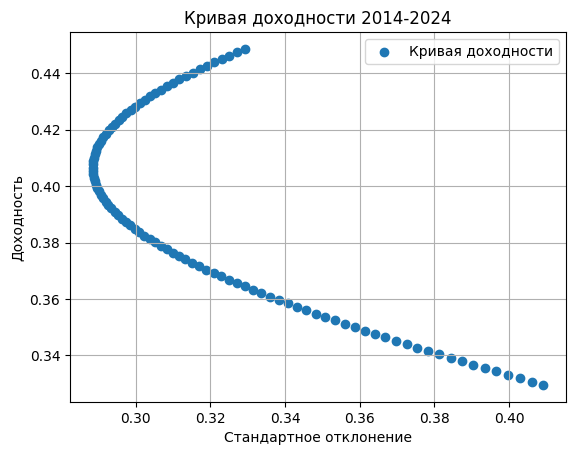

In [ ]:
plt.scatter(sd_p2, r_p2, label = 'Кривая доходности')
plt.title('Кривая доходности 2014-2024')
plt.ylabel('Доходность')
plt.xlabel('Стандартное отклонение')
plt.legend()
plt.grid()


Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [ ]:
df_r = pd.DataFrame({'Вес':w, 'Риск':sd_p2, 'Доходность': r_p2})
df_r.head()

,Вес,Риск,Доходность
0,0.00,0.409207,0.329528
1,0.01,0.406000,0.330731
2,0.02,0.402819,0.331935
3,0.03,0.399664,0.333138
4,0.04,0.396536,0.334341


__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [ ]:
min_sd = df_r['Риск'].min()
min_sd_p = df_r.loc[df_r['Риск'].idxmin()]
min_sd_p

Вес           0.640000
Риск          0.288412
Доходность    0.406528
Name: 64, dtype: float64

__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [ ]:
df_eff_p = df_r[(df_r['Риск']>min_sd_p['Риск'])&(df_r['Доходность']>min_sd_p['Доходность'])]

__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

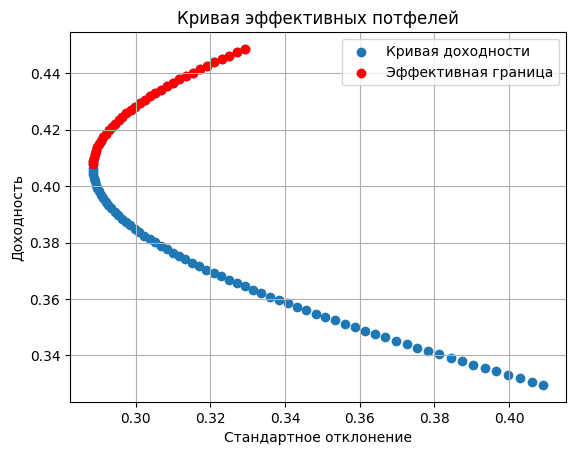

In [ ]:
plt.scatter(sd_p2, r_p2, label = 'Кривая доходности')
plt.scatter(df_eff_p['Риск'], df_eff_p['Доходность'], label = "Эффективная граница", color = 'red')

plt.title('Кривая эффективных потфелей')
plt.ylabel('Доходность')
plt.xlabel('Стандартное отклонение')
plt.grid()
plt.legend();

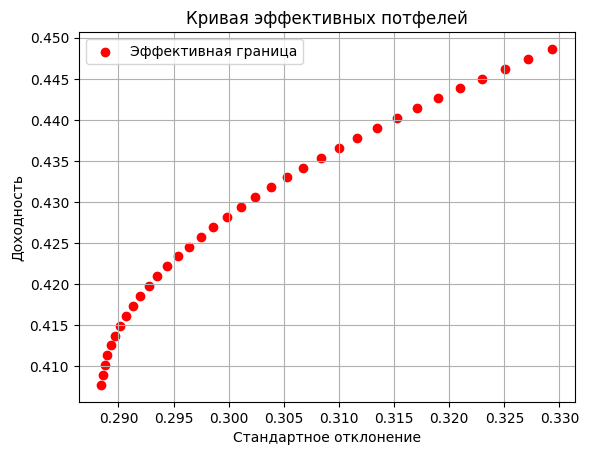

In [ ]:
plt.scatter(df_eff_p['Риск'], df_eff_p['Доходность'], label = "Эффективная граница", color = 'red')

plt.title('Кривая эффективных потфелей')
plt.ylabel('Доходность')
plt.xlabel('Стандартное отклонение')
plt.grid()
plt.legend();

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [ ]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [ ]:
df_r['Sharp'] = (df_r['Доходность']-r_f)/df_r['Риск']

__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [ ]:
max_sharp = df_r['Sharp'].max()
max_sharp_p = df_r.loc[df_r['Sharp'].idxmax()]
max_sharp_p

Вес           0.810000
Риск          0.298598
Доходность    0.426981
Sharp         1.034772
Name: 81, dtype: float64

Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [ ]:
sigma = np.array([min_sd, max_sharp_p['Риск']])   #...значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа. это про max_sharp_p['Риск']
sigma

array([0.28841208, 0.29859803])

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [ ]:
r = max_sharp * sigma + r_f
r

array([0.41644072, 0.42698085])

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

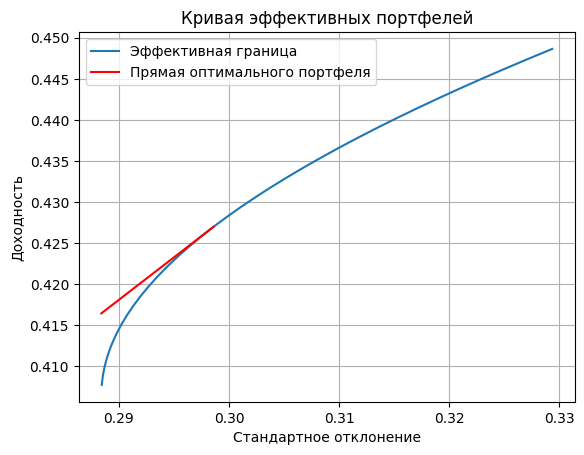

In [ ]:
plt.plot(df_eff_p['Риск'], df_eff_p['Доходность'], label = "Эффективная граница")
plt.plot(sigma, r, color = 'red', label = 'Прямая оптимального портфеля')
plt.title('Кривая эффективных портфелей')
plt.ylabel('Доходность')
plt.xlabel('Стандартное отклонение')
plt.grid()
plt.legend();


Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

In [ ]:
max_sharp

1.0347718978386065

**Ответ:** Шарп рассчитывается как Е(доходность актива - доходность безриска (условно гос облигация)) / стандартное отклонения актива. Чем больше числитель -> больше дробь при каком-то фикс знаменателе. Для того, чтобы определить наиболее доходную акцию как в нашем случае, нужно сравнить активы и выбрать те, у которых превышение истинной доходности над безриском больше при собственной волатильности.

Есть есть планка Х по волатильности актива, то можем рассматривать только пул из подходящих под условие экземляров и в этом множестве уже искать максимальный коэффицент Шарпа.

В нашем случае коэффицент положительный, и даже больше 1, а то означает, что риск покрывается более высокой премией. А вообще это всего лишь вспомогательный показатель, который не дает полной картины об эффективности портфеля. В сигме в знаменателе не учитываются различия между колебаниями цены вверх или вниз, она измеряет совокупную волатильность портфеля. Может так сложиться, что приобретем достаточно рискованную бумагу непонятной конторы, которая когда-то за определенный период показала хорошую доходность, а в последующем возникнут сложности в управлении всем портфелем - нужно чаще отслеживать и ребалансировать, или ее доходность резко начнет сокращаться, или новостной фон подключится негативный, а волатильная бумага особенно сильно чувтвительная к такому. В общем может закончить как в том видео из шапки этой тетрадки.

---



Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.

<img src = 'https://sun9-54.userapi.com/impg/rklfKaUpB0_lBg-t4E_r6HJ1NCInf0RpFr76GA/jbdODnmaiyw.jpg?size=640x998&quality=96&sign=b712bdff70b4813aca7e2ea8f8e42661&type=album' width = 400>


<img src = 'https://sun9-44.userapi.com/impg/61PcBq9uwgyXuyv0tT9kCZKJuSFolmdJ8o4ekw/e9qfhOARJlI.jpg?size=828x647&quality=95&sign=0043cd19b2279644b1f1e459e9b914d8&type=album![image.png](attachment:image.png)' width = 600>